# Kaggle


In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d kazanova/sentiment140
import zipfile
import os

# Extract the dataset
with zipfile.ZipFile('sentiment140.zip', 'r') as zip_ref:
    zip_ref.extractall('path_to_extract')

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
 95% 77.0M/80.9M [00:03<00:00, 34.4MB/s]
100% 80.9M/80.9M [00:03<00:00, 23.2MB/s]


In [ ]:
import pandas as pd

# Memuat dataset ke dalam pandas DataFrame
file_path = 'path_to_extract/training.1600000.processed.noemoticon.csv'
df = pd.read_csv(file_path, encoding='latin-1', header=None)

# Menampilkan beberapa baris pertama dari dataset
print(df.head())

   0           1                             2         3                4  \
0  0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_   
1  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
2  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
3  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
4  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   

                                                   5  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1  is upset that he can't update his Facebook by ...  
2  @Kenichan I dived many times for the ball. Man...  
3    my whole body feels itchy and like its on fire   
4  @nationwideclass no, it's not behaving at all....  


In [ ]:
# Menambahkan nama kolom ke dataset
df.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']

# Melihat data dengan nama kolom
print(df.head())


   sentiment          id                          date     query  \
0          0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1          0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2          0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3          0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4          0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [ ]:
# Melihat informasi dataset
print(df.info())

# Melihat distribusi sentimen (0 = negatif, 4 = positif)
print(df['sentiment'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   query      1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB
None
sentiment
0    800000
4    800000
Name: count, dtype: int64


Data Cleaning

In [ ]:
import re

def clean_text(text):
    # Menghapus URL
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Menghapus mention @user
    text = re.sub(r'\@\w+|\#', '', text)
    # Menghapus karakter spesial, angka, dan tanda baca
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Membersihkan teks pada kolom 'text'
df['cleaned_text'] = df['text'].apply(clean_text)

# Melihat hasil teks yang telah dibersihkan
print(df[['text', 'cleaned_text']].head())


                                                text  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  is upset that he can't update his Facebook by ...   
2  @Kenichan I dived many times for the ball. Man...   
3    my whole body feels itchy and like its on fire    
4  @nationwideclass no, it's not behaving at all....   

                                        cleaned_text  
0     A thats a bummer  You shoulda got David Car...  
1  is upset that he cant update his Facebook by t...  
2   I dived many times for the ball Managed to sa...  
3    my whole body feels itchy and like its on fire   
4   no its not behaving at all im mad why am i he...  


ANALISIS SENTIMEN




Term Frequency - Inverse Document Frequency (TF-IDF) atau Bag of Words

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Mengubah sentimen 4 menjadi 1 (positif)
df['sentiment'] = df['sentiment'].replace(4, 1)

# Menggunakan TF-IDF untuk vektorisasi teks
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_text'])

# Output (sentimen)
y = df['sentiment']


MODEL LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.790465625
              precision    recall  f1-score   support

           0       0.80      0.78      0.79    159494
           1       0.78      0.80      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



Visualisasi Hasil

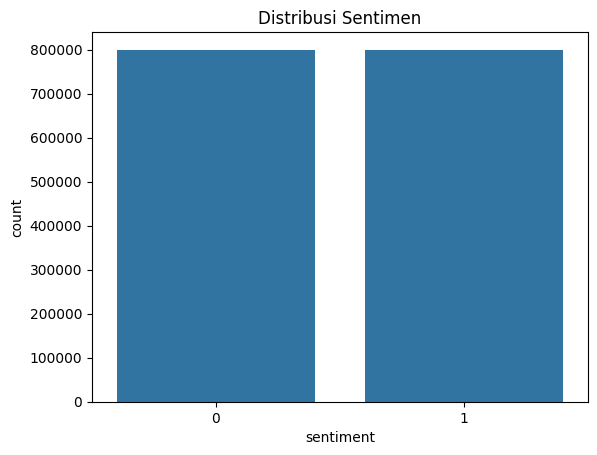

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi sentimen
sns.countplot(x='sentiment', data=df)
plt.title('Distribusi Sentimen')
plt.show()


Tuning Hyperparameter

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter yang akan diuji
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2']
}

# Membuat model Logistic Regression dengan GridSearchCV
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Tampilkan hyperparameter terbaik
print("Best hyperparameters:", grid.best_params_)

# Evaluasi model dengan parameter terbaik
y_pred = grid.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best hyperparameters: {'C': 10, 'penalty': 'l2'}
0.790640625
              precision    recall  f1-score   support

           0       0.80      0.78      0.79    159494
           1       0.78      0.80      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



In [ ]:
from sklearn.model_selection import cross_val_score

# Melakukan cross-validation pada model yang sudah dilatih
scores = cross_val_score(LogisticRegression(C=grid.best_params_['C'], penalty='l2'), X, y, cv=5, scoring='accuracy')

# Menampilkan hasil rata-rata dan standar deviasi akurasi
print(f"Mean accuracy: {scores.mean():.2f}, Standard deviation: {scores.std():.2f}")


Mean accuracy: 0.79, Standard deviation: 0.00


MODEL NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Melatih model Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred_nb = nb_model.predict(X_test)
print(accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


0.769078125
              precision    recall  f1-score   support

           0       0.76      0.78      0.77    159494
           1       0.78      0.76      0.77    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



VISUALISASI


WordCloud

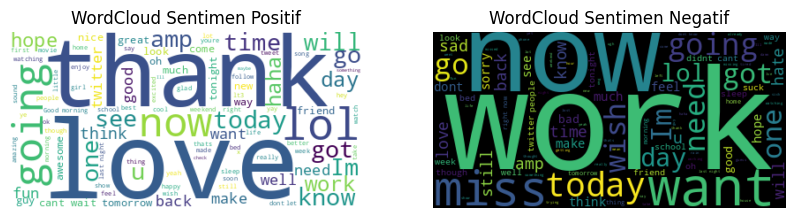

In [ ]:
from wordcloud import WordCloud

# Pisahkan tweet positif dan negatif
positive_tweets = df[df['sentiment'] == 1]['cleaned_text']
negative_tweets = df[df['sentiment'] == 0]['cleaned_text']

# Gabungkan teks tweet
positive_text = ' '.join(positive_tweets)
negative_text = ' '.join(negative_tweets)

# Buat WordCloud
positive_wordcloud = WordCloud(max_words=100, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(max_words=100, background_color='black').generate(negative_text)

# Visualisasikan WordCloud
plt.figure(figsize=(10,5))

# WordCloud positif
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen Positif')

# WordCloud negatif
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen Negatif')

plt.show()


Pipeline End-to-End

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Buat pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('model', LogisticRegression())
])

# Latih pipeline
pipeline.fit(df['cleaned_text'], df['sentiment'])

# Prediksi
y_pred_pipeline = pipeline.predict(df['cleaned_text'])

# Evaluasi
print(accuracy_score(df['sentiment'], y_pred_pipeline))
# print(classification_report(df['sentiment'], y_pred_pipeline))
# print(confusion_matrix(df['sentiment'], y_pred_pipeline))

0.79254125
              precision    recall  f1-score   support

           0       0.80      0.78      0.79    800000
           1       0.78      0.81      0.80    800000

    accuracy                           0.79   1600000
   macro avg       0.79      0.79      0.79   1600000
weighted avg       0.79      0.79      0.79   1600000

[[623358 176642]
 [155292 644708]]


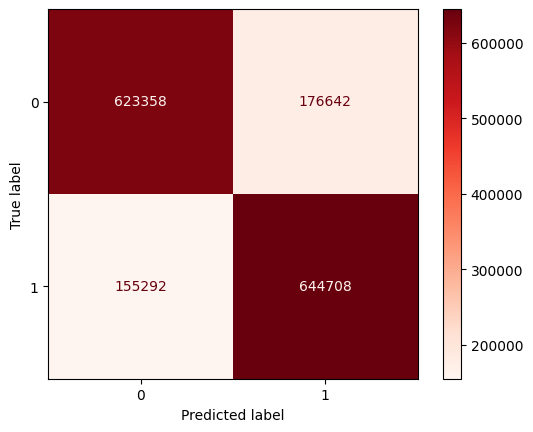

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Buat confusion matrix
cm = confusion_matrix(df['sentiment'], y_pred_pipeline)

# Visualisasikan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Reds)
plt.show()

Deployment Model

In [ ]:
from flask import Flask, request, jsonify
import joblib
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

app = Flask(__name__)

# Create and train the model
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('model', LogisticRegression())
])

# Assuming 'df' is your DataFrame with 'cleaned_text' and 'sentiment' columns
pipeline.fit(df['cleaned_text'], df['sentiment'])

# Save the trained model and vectorizer
joblib.dump(pipeline, 'sentiment_model.pkl')

# Load the model
model = joblib.load('sentiment_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json['text']
    prediction = model.predict([data])[0]
    return jsonify({'sentiment': 'positive' if prediction == 1 else 'negative'})

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
ERROR:root:Unexpected exception finding object shape
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_debugpy_repr.py", line 54, in get_shape
    shape = getattr(obj, 'shape', None)
  File "/usr/local/lib/python3.10/dist-packages/werkzeug/local.py", line 318, in __get__
    obj = instance._get_current_object()
  File "/usr/local/lib/python3.10/dist-packages/werkzeug/local.py", line 519, in _get_current_object
    raise RuntimeError(unbound_message) from None
RuntimeError: Working outside of request context.

This typically means that you attempted to use functionality that needed
an active HTTP request. Consult the documentation on testing for
information about how to avoid this problem.


Menyimpan dan Memuat Model

In [ ]:
import joblib

# Simpan model dan vectorizer
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

# Memuat model yang disimpan
model = joblib.load('sentiment_model.pkl')
tfidf = joblib.load('tfidf_vectorizer.pkl')
